# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

In [10]:
sinasc_raw.DTNASC

0        2019-02-19
1        2019-02-21
2        2019-02-25
3        2019-03-20
4        2019-03-23
            ...    
27023    2019-12-13
27024    2019-10-04
27025    2019-08-02
27026    2019-12-23
27027    2019-12-27
Name: DTNASC, Length: 27028, dtype: object

# Tarefa 1

### 1. Idade media das mães e dos pais por município (coluna munResNome)


In [4]:
idades = sinasc_raw[['IDADEMAE', 'IDADEPAI', 'munResNome']].groupby('munResNome').mean().round(2)
idades

,IDADEMAE,IDADEPAI
munResNome,,
Alta Floresta D'Oeste,25.99,29.55
Alto Alegre dos Parecis,24.84,29.18
Alto Paraíso,24.96,28.83
Alvorada D'Oeste,25.77,30.76
Ariquemes,25.61,32.47
Buritis,25.56,30.81
Cabixi,26.04,34.33
Cacaulândia,25.55,36.33
Cacoal,26.89,30.93


### 2. Peso médio dos bebes por sexo que nasceram no dia do seu aniversário por faixas de escolaridade mae
Ex: Você, aluna(o), nasceu no dia 10/01, então você precisa filtrar o conjunto de dados nessa data e calcular o peso médio dos bebês de cada sexo por faixa de escolaridade da mãe.

In [18]:
dia_nascim = sinasc_raw.loc[(sinasc_raw['DTNASC'] == '2019-03-25'), ['DTNASC', 'SEXO', 'ESCMAE', 'PESO']]
peso_medio_bebes = dia_nascim.groupby(['ESCMAE', 'SEXO']).mean()
peso_medio_bebes

PESO
ESCMAE          SEXO                  
1 a 3 anos      Feminino   3335.000000
12 anos ou mais Feminino   3354.363636
                Masculino  3541.181818
4 a 7 anos      Feminino   3303.272727
                Masculino  3352.500000
8 a 11 anos     Feminino   3131.806452
                Masculino  3280.384615

### 3. Qual o municipio que nasceu menos bebe em 2019?
    - qual a idade media, maxima, minima das maes nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?

In [50]:
menos_nascim = sinasc_raw.groupby('munResNome')['QTDFILVIVO'].count().sort_values().dropna()
menos_nascim

munResNome
Município ignorado - RO         1
Castanheiras                   32
Pimenteiras do Oeste           40
Primavera de Rondônia          43
Parecis                        43
Rio Crespo                     47
São Felipe D'Oeste             53
Teixeirópolis                  64
Cacaulândia                    75
Vale do Paraíso                79
Cabixi                         80
Ministro Andreazza             84
Vale do Anari                  92
Theobroma                      95
Novo Horizonte do Oeste        97
Santa Luzia D'Oeste            99
Itapuã do Oeste               100
Nova União                    103
Governador Jorge Teixeira     108
Corumbiara                    126
Campo Novo de Rondônia        131
Alto Alegre dos Parecis       152
Chupinguaia                   160
Mirante da Serra              163
Seringueiras                  167
Urupá                         169
Monte Negro                   192
Alvorada D'Oeste              202
Cujubim                       203
Col

O município de RO que menos teve nascimento no ano de 2019 foi o Castanheiras, com 32 nascimentos

In [319]:
# Qual a média, o mínimo e o máximo da idade das mães nesse Município?
castanheiras = sinasc_raw.loc[(sinasc_raw['munResNome'] == 'Castanheiras') & (sinasc_raw['SEXO'] == 'Feminino')]
idades_maes = castanheiras[['IDADEMAE']].agg([np.mean, min, max]).round(2)
idades_maes

,IDADEMAE
mean,26.44
min,17.00
max,39.00


In [318]:
# idade media, maxima, minima dos pais em Castanheiras?
pais_castanheiras = sinasc_raw.loc[(sinasc_raw['munResNome'] == 'castanheiras') & (sinasc_raw['SEXO'] == 'Masculino')]
idades_pais = castanheiras[['IDADEPAI']].agg([np.mean, min, max]).round(2)
idades_pais

,IDADEPAI
mean,29.79
min,17.00
max,43.00


### 4. Qual o municipio que nasceu mais bebe no mês de março?
    - qual a quantidade de filhos vivos media, maxima, minima nesse municipio?
    - qual a idade media, maxima, minima dos pais nesse municipio?



In [410]:
# Separando os nascimentos em março, criando uma nova coluna com esses nascimentos e mostrando quantos nascimentos ocorreram por município
sinasc_raw['Nasc_Março'] = (sinasc_raw['DTNASC'] <= '2019-03-31') | (sinasc_raw['DTNASC'] >= '2019-03-01')
sinasc_raw['Nasc_Março']

mun_march = sinasc_raw.groupby('munResNome')['Nasc_Março'].count().sort_values(ascending=False).head()
mun_march

munResNome
Porto Velho    8437
Ji-Paraná      2182
Ariquemes      1729
Vilhena        1590
Cacoal         1374
Name: Nasc_Março, dtype: int64

O Município de Porto Velho é o que mais nasceu crianças em março

In [364]:
# Qual a quantidade de filhos vivos média, máxima e mínima nesse município?
filvivos_portovelho = sinasc_raw.loc[(sinasc_raw['munResNome'] == 'Porto Velho') & (sinasc_raw['QTDFILVIVO'])]
qtde_filhos = filvivos_portovelho[['QTDFILVIVO']].agg([np.mean, min,max]).round(2)
qtde_filhos

,QTDFILVIVO
mean,1.74
min,1.00
max,12.00


In [365]:
# Qual a idade média, máxima e mínima dos pais nesse Município?
pais_portoVelho = sinasc_raw.loc[(sinasc_raw['munResNome'] == 'Porto Velho') & (sinasc_raw['SEXO'] == 'Masculino')]
idades_pais_portoVelho = pais_portoVelho[['IDADEPAI']].aggregate([np.mean, min,max]).round(2)
idades_pais_portoVelho

,IDADEPAI
mean,31.98
min,17.00
max,60.00


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados. Algo que você julgue relevante e novo pra você.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios x é maior que y.

In [371]:
sinasc_raw.dtypes

ORIGEM          int64
CODESTAB      float64
CODMUNNASC      int64
LOCNASC         int64
IDADEMAE        int64
               ...   
munResLat     float64
munResLon     float64
munResAlt     float64
munResArea    float64
Nasc_Março       bool
Length: 70, dtype: object

In [372]:
sinasc_raw.select_dtypes(exclude=['int64','float64'])

,ESCMAE,GESTACAO,GRAVIDEZ,PARTO,DTNASC,SEXO,RACACOR,DTCADASTRO,CODANOMAL,VERSAOSIST,DTRECEBIM,munResStatus,munResTipo,munResNome,munResUf,Nasc_Março
0,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-19,Masculino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,True
1,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-21,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,True
2,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-02-25,Feminino,Branca,2019-03-08,NaN,3.2.01,2019-03-08,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,True
3,12 anos ou mais,37 a 41 semanas,Única,Cesáreo,2019-03-20,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,True
4,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-03-23,Feminino,Parda,2019-04-03,NaN,3.2.01,2019-04-09,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,12 anos ou mais,32 a 36 semanas,Única,Cesáreo,2019-12-13,Masculino,Branca,2020-09-28,NaN,3.2.01,2020-10-13,ATIVO,MUNIC,Vilhena,Rondônia,True
27024,8 a 11 anos,37 a 41 semanas,Única,Vaginal,2019-10-04,Masculino,Branca,2019-10-16,NaN,3.2.01,2019-10-21,ATIVO,MUNIC,Chupinguaia,Rondônia,True
27025,8 a 11 anos,37 a 41 semanas,Única,Cesáreo,2019-08-02,Masculino,Parda,2019-08-07,NaN,3.2.00,2019-08-07,ATIVO,MUNIC,Vilhena,Rondônia,True
27026,8 a 11 anos,32 a 36 semanas,Única,Vaginal,2019-12-23,Masculino,Parda,2020-01-07,NaN,3.2.00,2020-01-07,ATIVO,MUNIC,Vilhena,Rondônia,True


In [373]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea',
       'Nasc_Março'],
 

<AxesSubplot:xlabel='IDADEMAE', ylabel='PESO'>

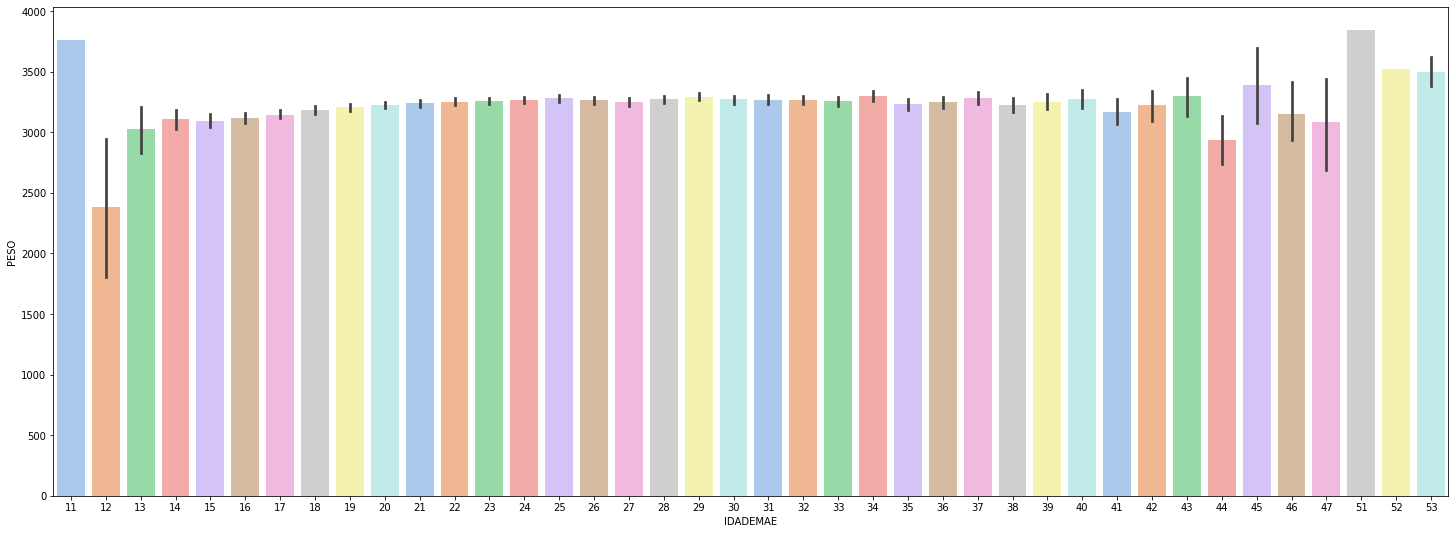

In [383]:
# Gráfico mostrando os pesos dos bebês em 2019
plt.figure(figsize=(25, 9))
sns.barplot(data=sinasc_raw, x='IDADEMAE', y='PESO', palette='pastel')


Pelo gráfico acima observa-se que o peso médio dos bebês é aproximadamente 3.200 g

<AxesSubplot:xlabel='APGAR1', ylabel='GESTACAO'>

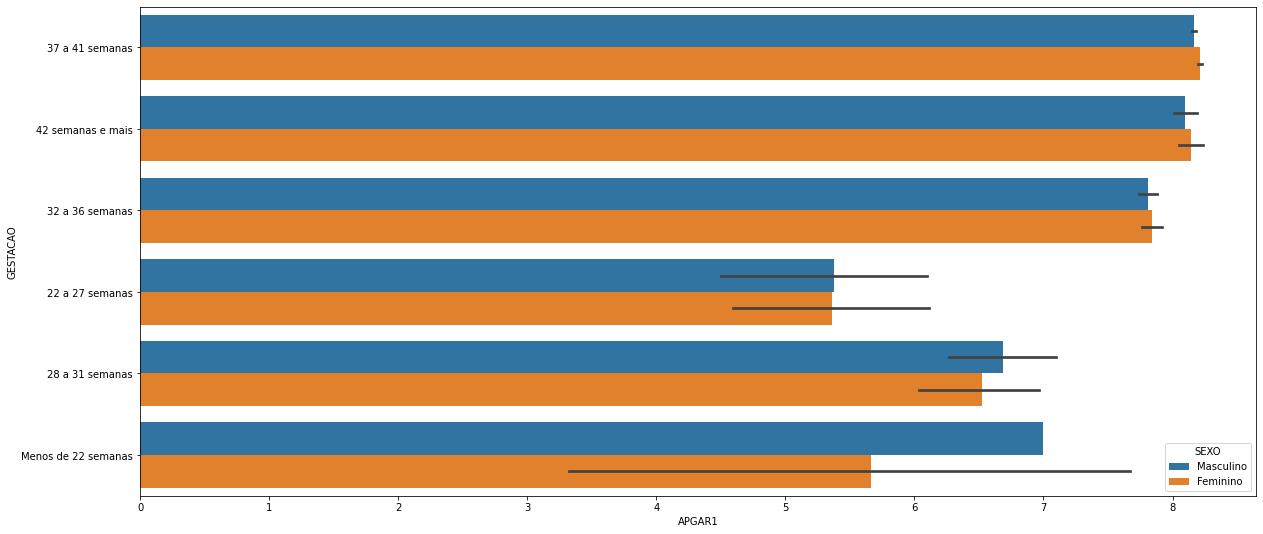

In [430]:
# APGAR1 e sexo
plt.figure(figsize=(20, 9))
sns.barplot(data=sinasc_raw, x='APGAR1', y='GESTACAO', hue='SEXO')


<h5> O APGAR é um índice de vitalidade de 0 a 10 atribuído a, praticamente, todos os recém-nascidos com 1, 5 e 10 minutos de nascimento. A pontuação é baseada em medidas de frequência cardíaca, esforço respiratório, cor da pele, tônus muscular e irritabilidade reflexa.</h5>
<p><h5>É considerado normal da pontuação 7 a 10.</h5></p>
<h5>Analizando o gráfico acima, nota-se que a partir do período da gestação de 32 semanas o APGAR tem maior pontuação e o sexo do bebê parece não influenciar no APGAR</h5>